In [1]:
from kan import *

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [31]:
model = KAN(width=[4,2,1,1], grid=3, k=3, seed=0, device=device)


In [32]:
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000, device=device)

# train the model
#model.train(dataset, opt="LBFGS", steps=20, lamb=1e-3, lamb_entropy=2.);
model.train(dataset, opt="LBFGS", steps=50, lamb=5e-5, lamb_entropy=2.);

train loss: 6.22e-03 | test loss: 6.23e-03 | reg: 7.89e+00 : 100%|██| 50/50 [00:40<00:00,  1.23it/s]


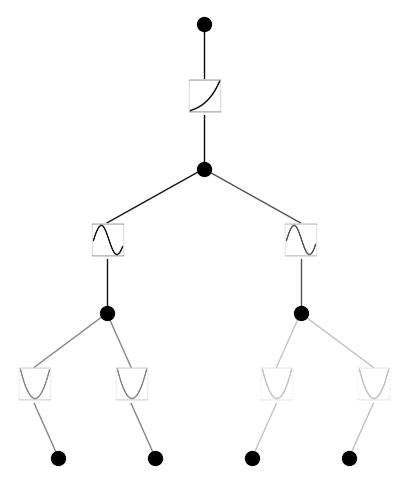

In [16]:
model.plot()

In [19]:
import pandas as pd

In [28]:
len(dataset["train_input"])

3000

In [3]:
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)

In [4]:
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [6]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 1.55e-01 | test loss: 1.31e-01 | reg: 2.04e+01 : 100%|██| 20/20 [00:11<00:00,  1.73it/s]


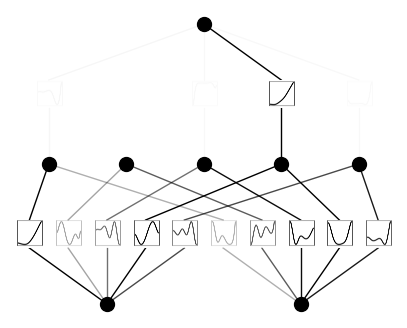

In [9]:
model.plot(beta=100)